# Project 03 - 3D reconstruction

__Handout date:__ 27.06.2024      
__Submission date:__ 18.07.2023 - 23:59
__Submission link:__ https://fz-juelich.sciebo.de/s/rVa2i83BrBmyaJ8


In this project, you will work on 3D reconstruction from stereo data.
You will estimate disparity maps from rectified images, and resolve inconsistencies in the results using graphical models.

For this task, you will use the [2014 Stereo Datasets](https://vision.middlebury.edu/stereo/data/scenes2014/).
The dataset contains rectified images and serves as a benchmark for depth estimation from stereo images.

1. Download the dataset and inspect its structure.
1. Choose at least two images from the dataset to work with. For the beginning, work with the default images (no variation in lightning or exposure).
1. Use the methods discussed in the lecture to compute the disparity between the two images, which involves:
    1. Scanline approach to identify matching pixels using an appropriate similarity metric.
    1. Cross-checking using reverse scanline.
    1. Resolution of ambiguous matches.
1. Use the computed disparity to estimate the depth.
1. Repeat the above steps using the provided images with varying lightning and exposure.
1. Use a Markov Random Field (MRF) to resolve holes and inaccuracies in the computed disparity maps.
    1. Install [gco-wrapper](https://github.com/Borda/pyGCO) using `pip install gco-wrapper`.
    1. Convert the task of smoothing the disparity map into a MRF problem. In particular, think about how labels can be defined for this task (tip: maximum disparity).
    1. Use `cut_grid_graph` or `cut_grid_graph_simple` to solve the defined MRF.
1. Recompute the depth map using your corrected disparity maps and compare them to the previous result. Repeat the analysis for your selected images under different lightning and exposure.

__Tip:__ Do not replicate your code, use functions to repeat the analysis on different image pairs.

In [1]:
import cv2
import numpy as np
img0_g = cv2.imread('./im0.png', 0)
img1_g = cv2.imread('./im1.png', 0)
l,w = img0_g.shape

In [2]:
img0_g.shape, img1_g.shape

((1988, 2880), (1988, 2880))

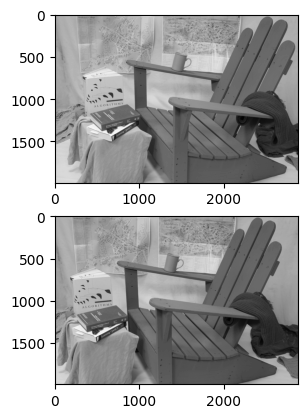

In [ ]:
import matplotlib.pyplot as plt
ax1 = plt.subplot(211)
ax1.imshow(img0_g, cmap='gray')
ax2 = plt.subplot(212, sharex=ax1)
ax2.imshow(img1_g, cmap='gray')

In [9]:
l_img = np.pad(img0_g,[(3,3), (3,3)], mode='edge')
r_img = np.pad(img1_g,[(3,3), (16,3)], mode='edge')

In [10]:
l_img.shape, r_img.shape

((1994, 2886), (1994, 2899))

In [19]:
def stereo_matching(limg, rimg, dmax, w_size):
    l_img = np.pad(limg, [(w_size, w_size), (w_size, w_size)], mode='edge')
    r_img = np.pad(rimg, [(w_size, w_size), (w_size + dmax, w_size)], mode='edge')

    length, width = l_img.shape
    diff = np.zeros((length, width, dmax))
    d = np.zeros_like(l_img)

    for i in range(0, dmax):
      I_L = l_img[:,0: width]
      I_R = r_img[:, i: width + i]
      d = np.square(I_L - I_R)/(length*width)
      #d = np.abs(l_img[:, 0:width-i] - r_img[:, i:width])
      d_p = np.zeros_like(l_img)
      for x in range(w_size, length - w_size):
        for y in range(w_size, width - w_size):
          #I_L = l_img[x - w_size: x + w_size, y - w_size: y + w_size]
          #I_R = r_img[x - w_size: x + w_size, y - w_size + dmax - i: y + w_size + dmax - i]
          #diff[x-w_size, y-w_size,i] = np.sum(np.square(I_L - I_R)/(length*width))
          d_p[x-w_size, y-w_size] = np.sum(d[x-w_size:x+w_size, y-w_size:y+w_size])
      diff[:, :, i] = d_p
      print(i)

    #dbest = np.zeros_like(l_img)
    # for i in range(0, length):
    #     for j in range(0, width):
    #         val = np.sort(diff[i, j, :])
    #         dbest[i, j] = val[0]
    dbest = np.argmin(diff, axis=2)
    return dbest

In [20]:
test = stereo_matching(img0_g, img1_g, 1, 200)

KeyboardInterrupt: 

In [29]:
w_size=3
dmax=1
l_img = np.pad(img0_g, [(w_size, w_size), (w_size, w_size)], mode='edge')
r_img = np.pad(img1_g, [(w_size, w_size), (w_size + dmax, w_size)], mode='edge')

length, width = l_img.shape
diff = np.zeros((length, width, dmax))
d = np.zeros_like(l_img)


I_L = l_img[:,0: width]
I_R = r_img[:, i: width + i]
d = np.square(I_L - I_R)/(length*width)
#d = np.abs(l_img[:, 0:width-i] - r_img[:, i:width])
d_p = np.zeros_like(l_img)
for x in range(w_size, length - w_size):
  for y in range(w_size, width - w_size):
    #I_L = l_img[x - w_size: x + w_size, y - w_size: y + w_size]
    #I_R = r_img[x - w_size: x + w_size, y - w_size + dmax - i: y + w_size + dmax - i]
    #diff[x-w_size, y-w_size,i] = np.sum(np.square(I_L - I_R)/(length*width))
    d_p[x-w_size, y-w_size] = np.sum(d[x-w_size:x+w_size, y-w_size:y+w_size])
    print(x,y)
diff[:, :, i] = d_p
print(i)

#dbest = np.zeros_like(l_img)
# for i in range(0, length):
#     for j in range(0, width):
#         val = np.sort(diff[i, j, :])
#         dbest[i, j] = val[0]
dbest = np.argmin(diff, axis=2)

Streaming output truncated to the last 5000 lines.
1336 515
1336 516
1336 517
1336 518
1336 519
1336 520
1336 521
1336 522
1336 523
1336 524
1336 525
1336 526
1336 527
1336 528
1336 529
1336 530
1336 531
1336 532
1336 533
1336 534
1336 535
1336 536
1336 537
1336 538
1336 539
1336 540
1336 541
1336 542
1336 543
1336 544
1336 545
1336 546
1336 547
1336 548
1336 549
1336 550
1336 551
1336 552
1336 553
1336 554
1336 555
1336 556
1336 557
1336 558
1336 559
1336 560
1336 561
1336 562
1336 563
1336 564
1336 565
1336 566
1336 567
1336 568
1336 569
1336 570
1336 571
1336 572
1336 573
1336 574
1336 575
1336 576
1336 577
1336 578
1336 579
1336 580
1336 581
1336 582
1336 583
1336 584
1336 585
1336 586
1336 587
1336 588
1336 589
1336 590
1336 591
1336 592
1336 593
1336 594
1336 595
1336 596
1336 597
1336 598
1336 599
1336 600
1336 601
1336 602
1336 603
1336 604
1336 605
1336 606
1336 607
1336 608
1336 609
1336 610
1336 611
1336 612
1336 613
1336 614
1336 615
1336 616
1336 617
1336 618
1336 619
1336

KeyboardInterrupt: 

In [31]:
w_size=3
dmax=1

length, width = img0_g.shape
diff = np.zeros((length, width, dmax))
d = np.zeros_like(img0_g)

d = np.abs(img0_g[:, 0:width-i] - img1_g[:, i:width])
d_p = np.zeros_like(img0_g)
for x in range(0, length):
  for y in range(0, width):
    #I_L = l_img[x - w_size: x + w_size, y - w_size: y + w_size]
    #I_R = r_img[x - w_size: x + w_size, y - w_size + dmax - i: y + w_size + dmax - i]
    #diff[x-w_size, y-w_size,i] = np.sum(np.square(I_L - I_R)/(length*width))
    d_p[x-w_size, y-w_size] = np.sum(d[x-w_size:x+w_size, y-w_size:y+w_size])
    print(x,y)
diff[:, :, i] = d_p

Streaming output truncated to the last 5000 lines.
144 2447
144 2448
144 2449
144 2450
144 2451
144 2452
144 2453
144 2454
144 2455
144 2456
144 2457
144 2458
144 2459
144 2460
144 2461
144 2462
144 2463
144 2464
144 2465
144 2466
144 2467
144 2468
144 2469
144 2470
144 2471
144 2472
144 2473
144 2474
144 2475
144 2476
144 2477
144 2478
144 2479
144 2480
144 2481
144 2482
144 2483
144 2484
144 2485
144 2486
144 2487
144 2488
144 2489
144 2490
144 2491
144 2492
144 2493
144 2494
144 2495
144 2496
144 2497
144 2498
144 2499
144 2500
144 2501
144 2502
144 2503
144 2504
144 2505
144 2506
144 2507
144 2508
144 2509
144 2510
144 2511
144 2512
144 2513
144 2514
144 2515
144 2516
144 2517
144 2518
144 2519
144 2520
144 2521
144 2522
144 2523
144 2524
144 2525
144 2526
144 2527
144 2528
144 2529
144 2530
144 2531
144 2532
144 2533
144 2534
144 2535
144 2536
144 2537
144 2538
144 2539
144 2540
144 2541
144 2542
144 2543
144 2544
144 2545
144 2546
144 2547
144 2548
144 2549
144 2550
144 2551
144 

KeyboardInterrupt: 

In [ ]:
#Estimate depth by the computed disparity with equation Z = baseline * f / (d + doffs)
doffs=209.059
baseline=176.252
f=4161.221
Z = baseline*f/(test + doffs)

In [ ]:
#Estimate disparity and depth with varing lightening
img1l_g = cv2.imread('./im1L.png', 0)

In [ ]:
test_l = stereo_matching(img0_g, img1l_g, 60, 6)

In [ ]:
#Estimate disparity and depth with different exposure
img1e_g = cv2.imread('./im1E.png', 0)

In [ ]:
test_e = stereo_matching(img0_g, img1e_g, 60, 6)